#**PHÂN TÍCH ĐƠN BIẾN**

Import thư viện và data từ drive

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install gdown
import gdown

file_name = 'final.csv'
url = f'https://drive.google.com/uc?id=1XE9W838KPLyGXDA7aZxGCdfmfYdY8L6J'

# Download the file
gdown.download(url,file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1XE9W838KPLyGXDA7aZxGCdfmfYdY8L6J
To: /content/final.csv
100%|██████████| 817k/817k [00:00<00:00, 92.1MB/s]


'final.csv'

In [ ]:
import pandas as pd
# Read data file
data = pd.read_csv(file_name)
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          3417 non-null   object 
 1   Label         3417 non-null   object 
 2   namsinh       3417 non-null   float64
 3   gioitinh      3417 non-null   float64
 4   noisinh       3417 non-null   object 
 5   lopsh         3417 non-null   object 
 6   khoa          3417 non-null   object 
 7   hedt          3417 non-null   object 
 8   khoahoc       3417 non-null   float64
 9   chuyennganh   3417 non-null   object 
 10  dien_tt       3417 non-null   object 
 11  lop12_matinh  3417 non-null   float64
 12  truong_thpt   3417 non-null   object 
 13  xlhv_1        3417 non-null   float64
 14  xlhv_2        3417 non-null   float64
 15  xlhv_3        3417 non-null   float64
 16  xlhv_4        3417 non-null   float64
 17  xlhv_5        3417 non-null   float64
 18  xlhv_6        3417 non-null 

In [ ]:
# Divine columns to there group :(Continous,Category,Target)
continuous_features = ['namsinh','dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6',
       'sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6','drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6']
category_features = ['gioitinh', 'noisinh', 'khoa',
       'hedt', 'khoahoc', 'chuyennganh', 'dien_tt', 'truong_thpt','lop12_matinh']
target = 'Label'

##Phân tích đơn biến giữa biến mục tiêu và các biến liên tục

###Box plot

####Hàm vẽ biểu đồ box plot

In [ ]:
# Loop through your continuous features
def plot_conti(x):
  for feature in x:
    plt.figure(figsize=(8, 6))

    # Create a boxplot with target as the hue and assign different colors to each category
    sns.boxplot(x=target, y=feature, data=df, hue=target, palette="Set2", legend=False)

    # Add a title to the plot
    plt.title(f'Box plot of {feature} with target variable {target}')

    # Show the plot
    plt.show()


####Box plot của điểm rèn luyện qua từng học kì

Hàm chuyển đổi các giá trị phân loại của "drl" sang giá trị số

In [ ]:
#Funcion to replace rank drl to num_rank
def replace_drl(x):
  for i in x :
    df[i] = df[i].replace('Xuat Sac',1)
    df[i] = df[i].replace('Gioi',2)
    df[i] = df[i].replace('Kha',3)
    df[i] = df[i].replace('Trung Binh',4)
    df[i] = df[i].replace('Yeu',5)
    df[i] = df[i].replace('Kem',6)



`Từ 1 -> n thể hiện rank của drl đang giảm dần`

Vẽ boxplot cho biến "drl"

<ipython-input-6-c15fa1a60406>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace('Kem',6)


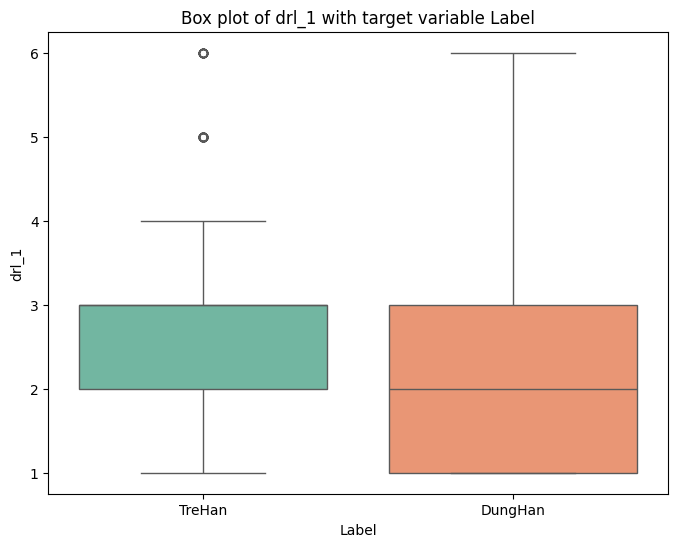

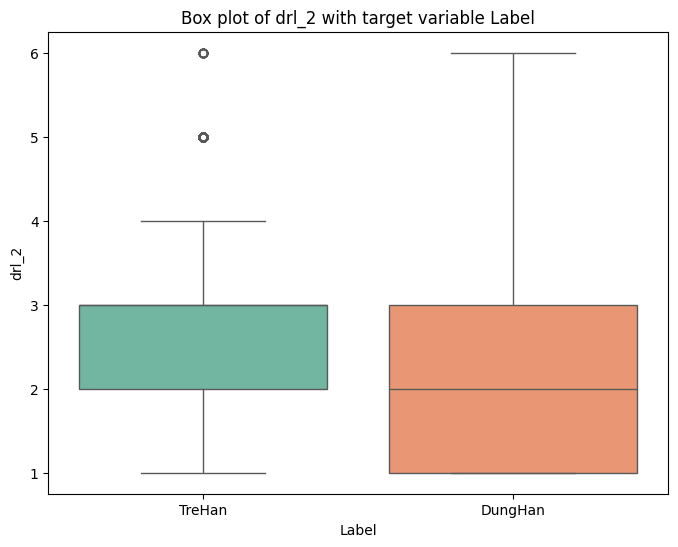

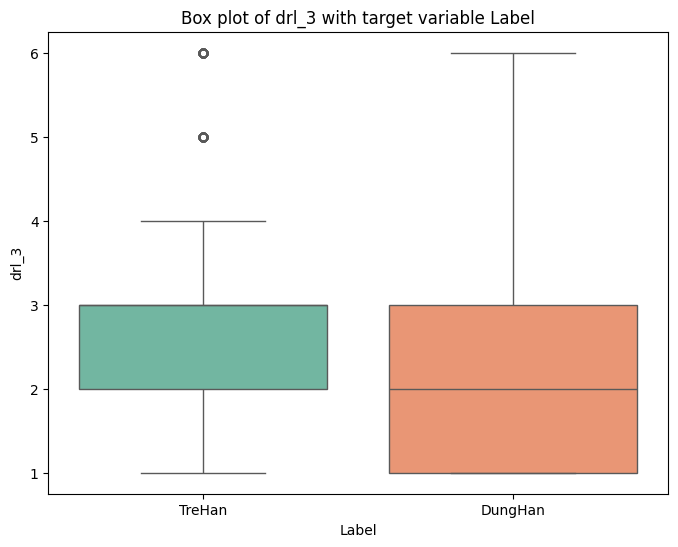

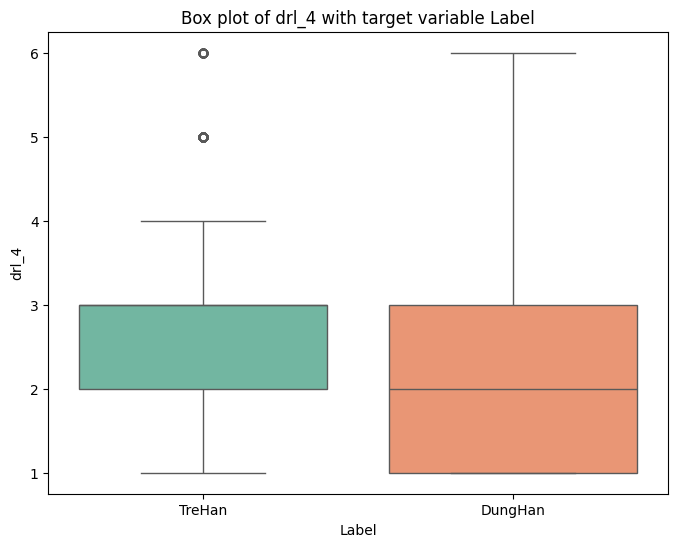

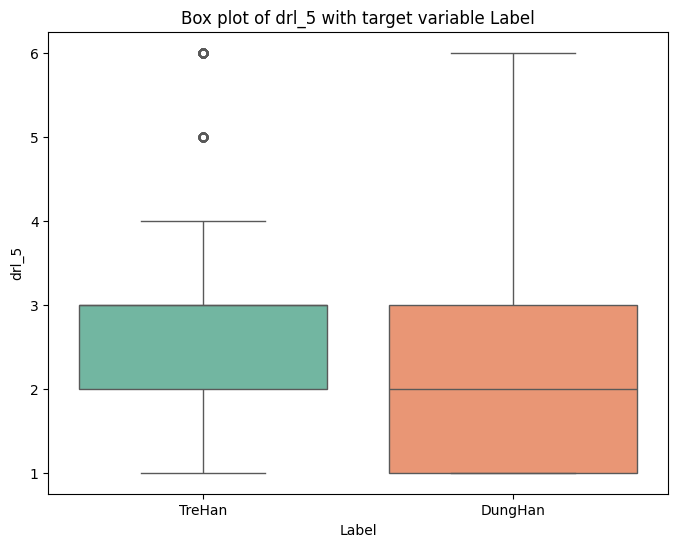

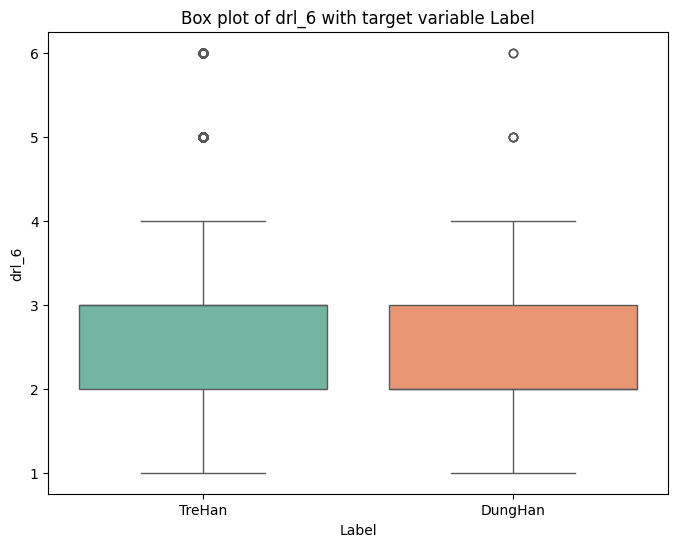

In [ ]:
# Plot DRL
drl_col = ['drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6']
replace_drl(drl_col)
plot_conti(drl_col)

- Ta có thể nhận thấy việc các sinh viên tốt nghiệp đúng hạn thường có điểm rèn luyện loại tốt ở các học kì đầu và giảm mạnh ở các kì sau.
- Điều này có thể là do các sinh viên tốt nghiệp đúng hạn thường hăng hái tham gia các hoạt động nhằm đạt học bổng của trường ở các học kì đầu, tuy nhiên các kì cuối họ tập trung vào các kĩ năng chuyên ngành hơn nên điểm rèn luyện có phần giảm xuống.

####Box plot của biến "namsinh"

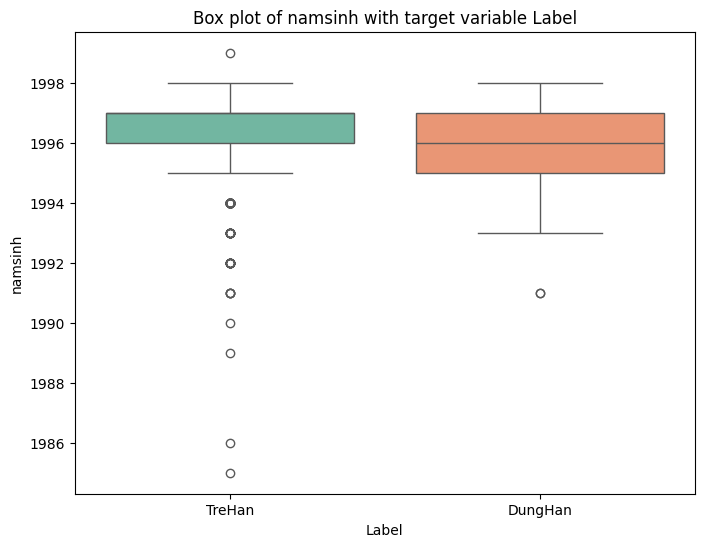

In [ ]:
plot_conti(['namsinh'])

- Ta có thể nhận thấy năm sinh ngày càng tăng thì tỉ lệ tốt nghiệp đúng hạn cũng tăng theo.

####Box plot của điểm trung bình qua từng học kì

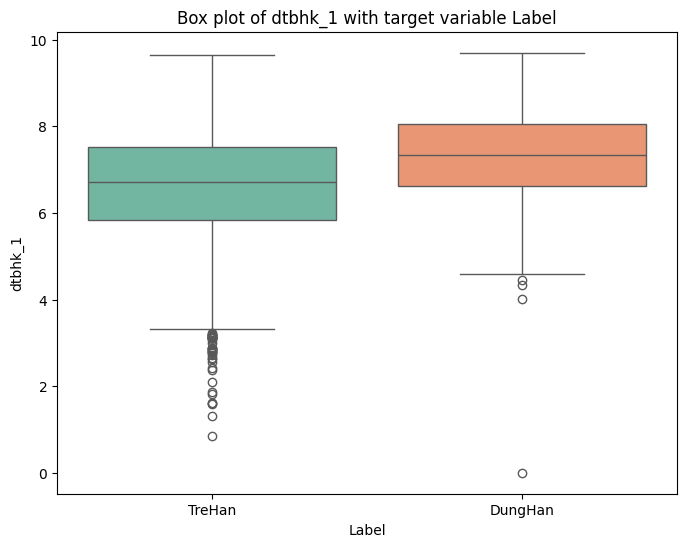

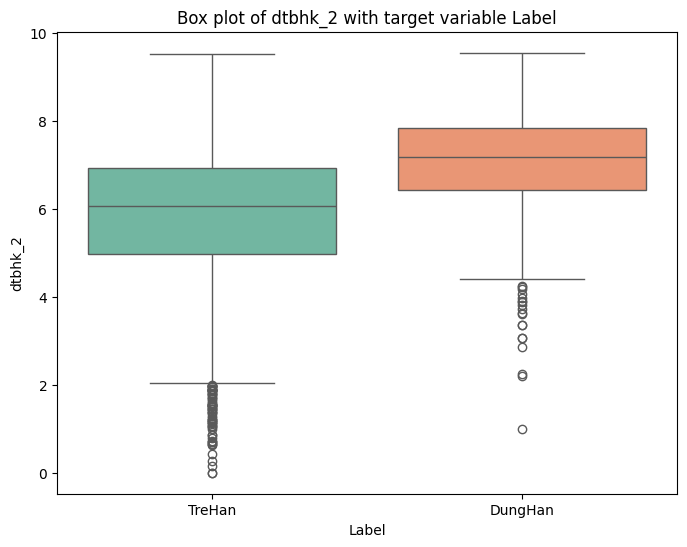

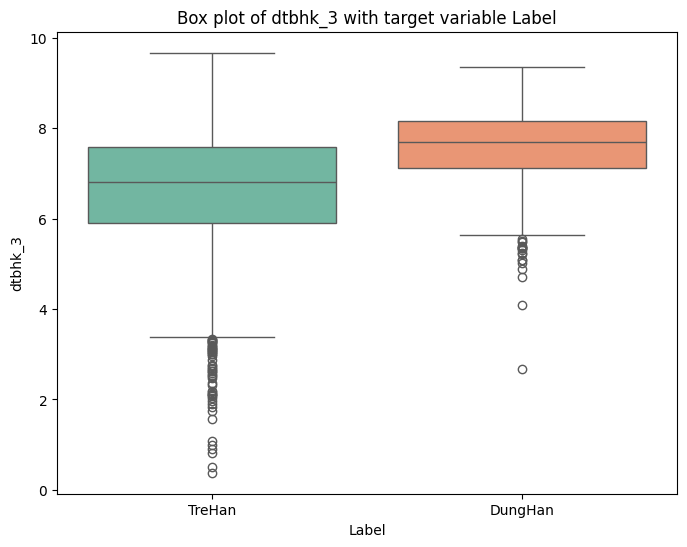

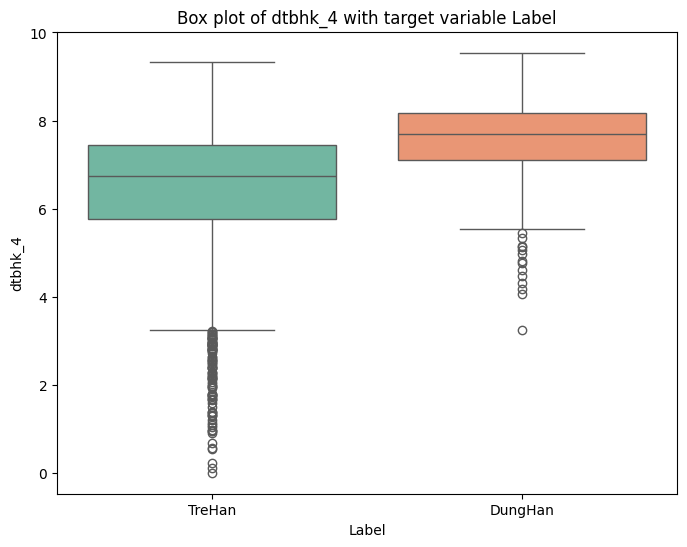

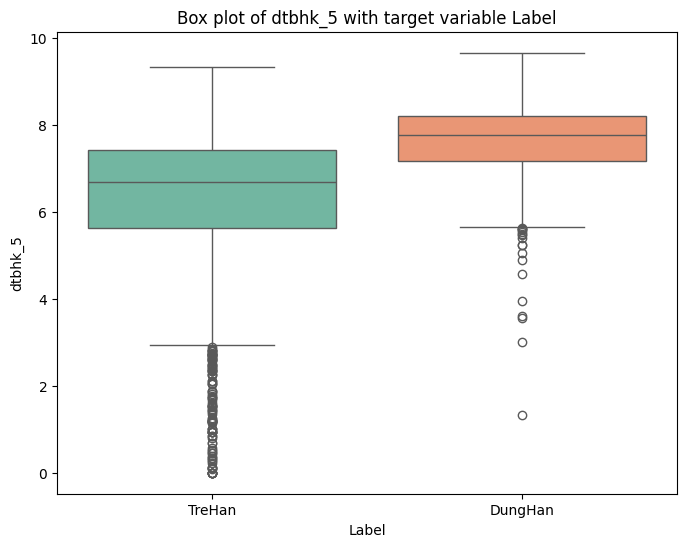

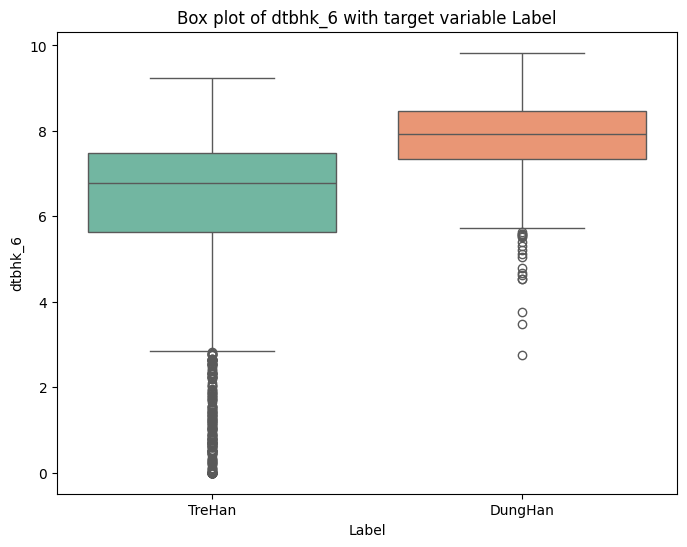

In [ ]:
DTB_HOCKI = ['dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6']
plot_conti(DTB_HOCKI)

- Ta có thể nhận ra ngay rằng các sinh viên có điểm trung bình học kì cao trong khoảng 8 -> 9 điểm sẽ tốt nghiệp đúng hạn.
- Còn lại các sinh viên nằm trong phổ điểm trung bình khá hoặc thấp hơn thường tốt nghiệp trễ hạn.

####Box plot của số tín chỉ học kì qua từng học kì

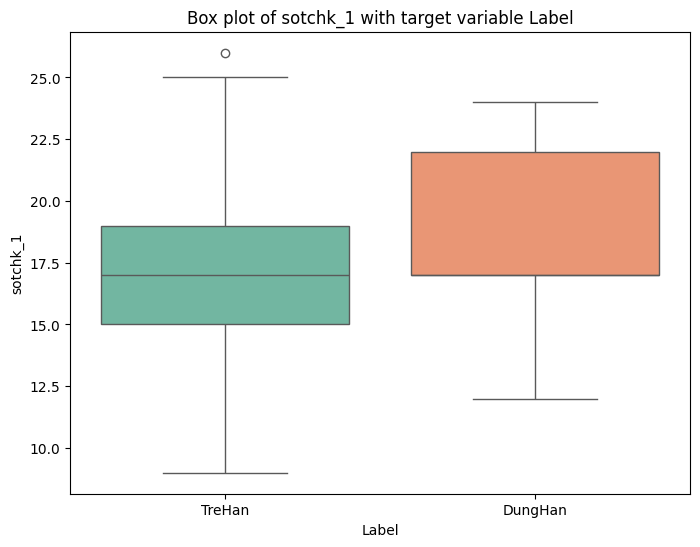

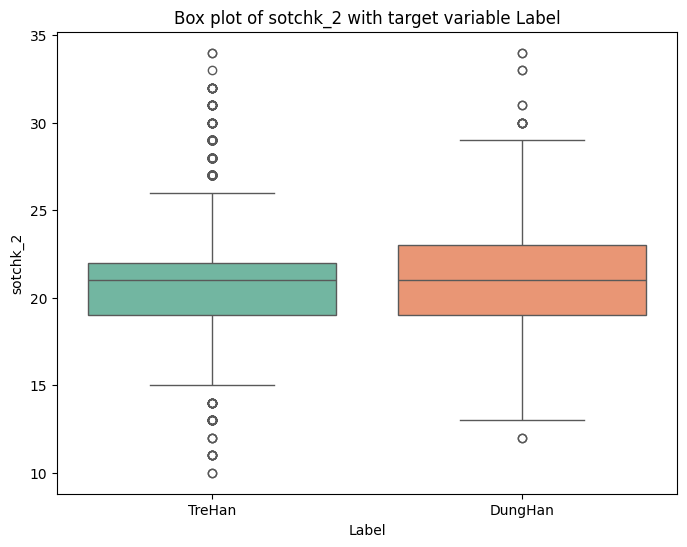

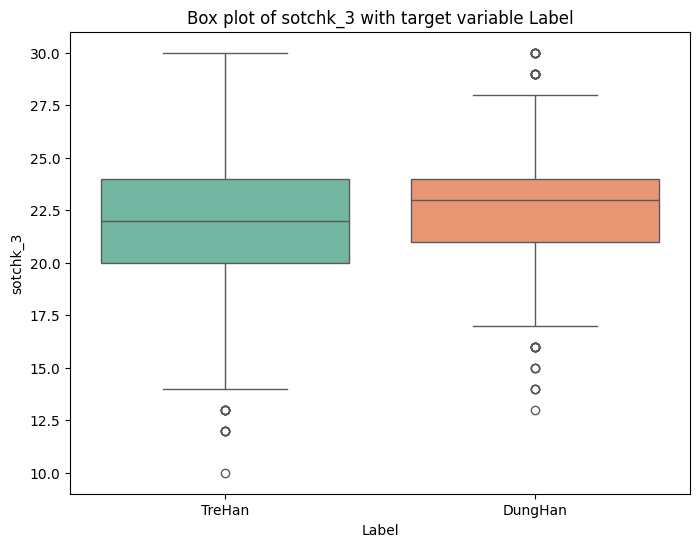

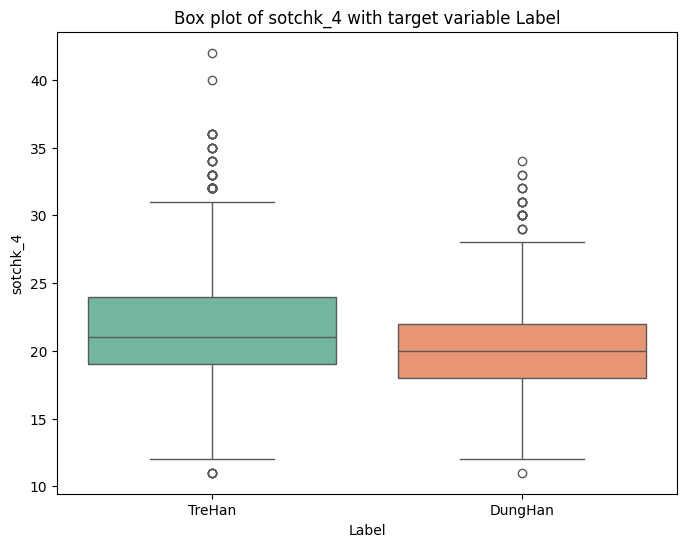

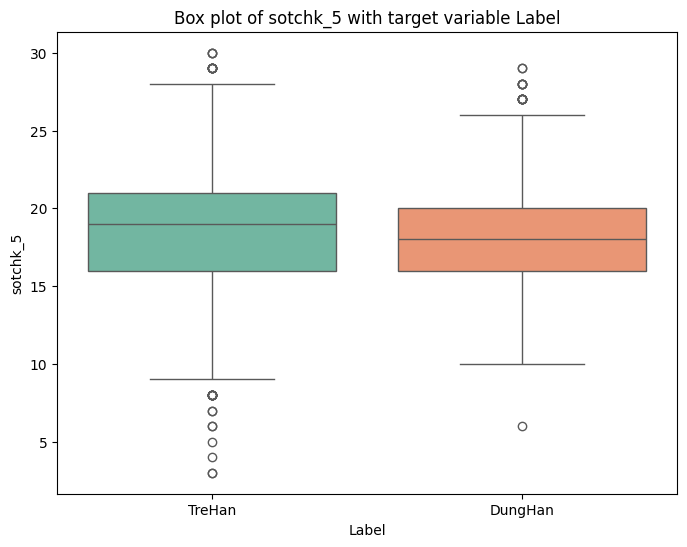

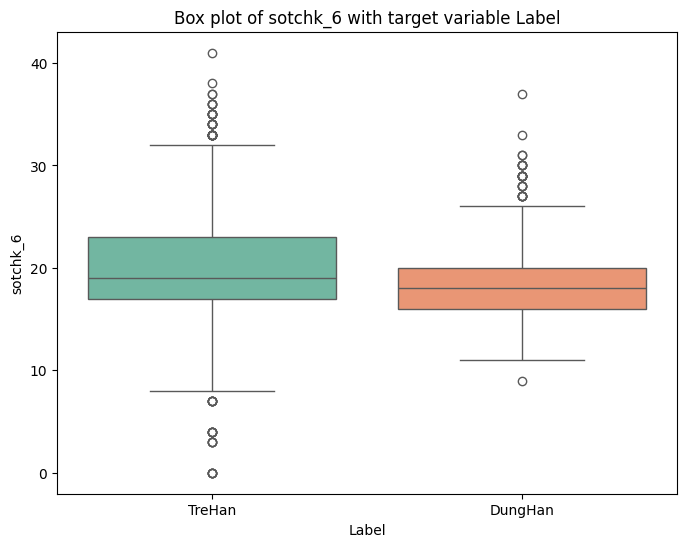

In [ ]:
TinChiHocKi= ['sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6']
plot_conti(TinChiHocKi)

- Các sinh viên tốt nghiệp đúng hạn thường học rất nhiều tín chỉ ở các học kì đầu và ít dần ở các học kì sau.
- Các sinh viên tốt nghiệp trễ hạn có số tín chỉ mỗi kì thường ở mức trung bình trong mọi kì.

###Phân tích phương sai one-way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create list to store result
f_values = []
p_values = []
significant = []

# Use ANOVA for once feature in continuous_features
for feature in continuous_features:
    model = ols(f'{feature} ~ C({target})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Get F and p-value
    f_val = anova_table.iloc[0]['F']
    p_val = anova_table.iloc[0]['PR(>F)']

    # Check p-value < 5%
    sig = p_val < 0.05

    # Store result to list
    f_values.append(f_val)
    p_values.append(p_val)
    significant.append(sig)

# Create Dataframe
result_df = pd.DataFrame({
    'Feature': continuous_features,
    'F-value': f_values,
    'p-value': p_values,
    '(p < 0.05)': significant
})

# Set feature is index
result_df.set_index('Feature', inplace=True)
# Sort F_value
result_df = result_df.sort_values(by='F-value', ascending=False)
result_df


,F-value,p-value,(p < 0.05)
Feature,,,
dtbhk_6,550.309905,5.884219e-113,True
dtbhk_5,534.499934,5.466149e-110,True
dtbhk_4,494.245373,2.235470e-102,True
dtbhk_2,431.763004,2.105352e-90,True
dtbhk_3,410.605868,2.647279e-86,True
drl_2,243.942864,3.600682e-53,True
drl_3,241.807082,9.809309e-53,True
drl_4,228.582341,4.908497e-50,True
dtbhk_1,209.970388,3.191583e-46,True


- Ta nhận thấy các giá trị p-value đều nằm ở mức < 0.05 , do vậy tất cả biến trên đều có ảnh hưởng đến sự biến thiên của biến target nhưng với các mức độ khác nhau.
- Tuy nhiên, do giá trị của F-value quá cao nên các biến này với biến mục tiêu chưa hoàn toàn thể hiện được hết độ biến thiên của nhau một cách rõ rệt.

##Phân tích đơn biến giữa biến mục tiêu và các biến phân loại

###Plot

####Hàm vẽ plot

In [ ]:
def plot_cate(x):
  for feature in x:
    contingency_table = pd.crosstab(df[feature], df[target])
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt='d')
    plt.title(f'Heatmap of {feature} with target variable {target}')
    plt.show()


####Plot các biến về thông tin sinh viên: "noisinh", "gioitinh"

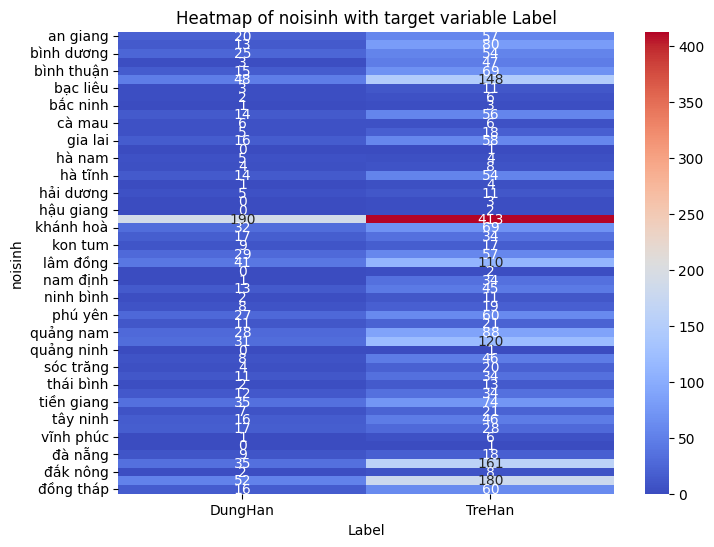

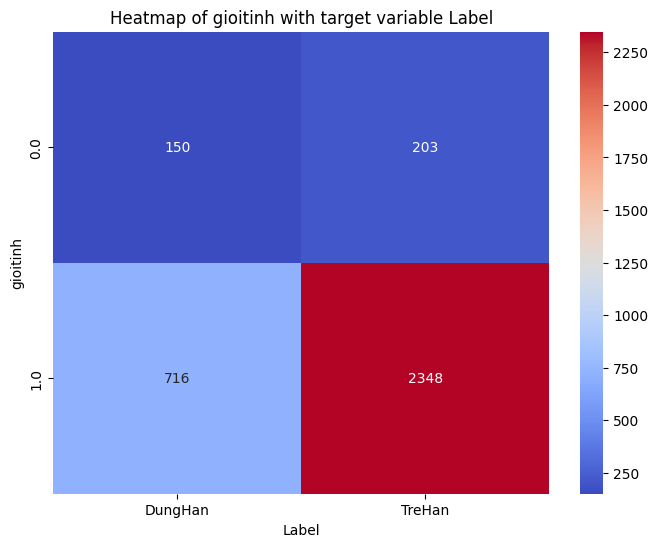

In [ ]:
SV_cate =['noisinh','gioitinh']
plot_cate(SV_cate)

- Tỉ lệ giới tính chênh lệch cao đối với bộ dữ liệu , ở đây tỉ lệ nam : nữ là 10:1.
- Ta thấy là sinh viên nam có tỉ lệ tốt nghiệp trễ hạn cao hơn nữ giới với tỉ lệ đúng hạn : trễ hạn là 1:3 .Trong khi đó ở nữ là 3:4.

####Plot các biến về đại học: "khoa","hedt", "khoahoc", "chuyennganh"

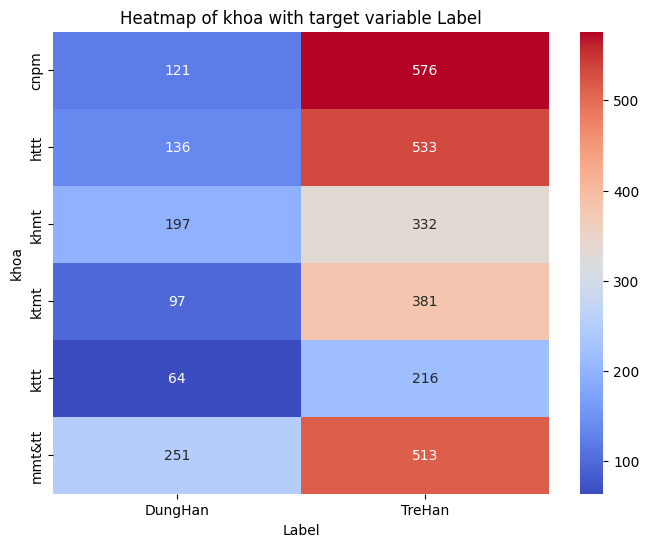

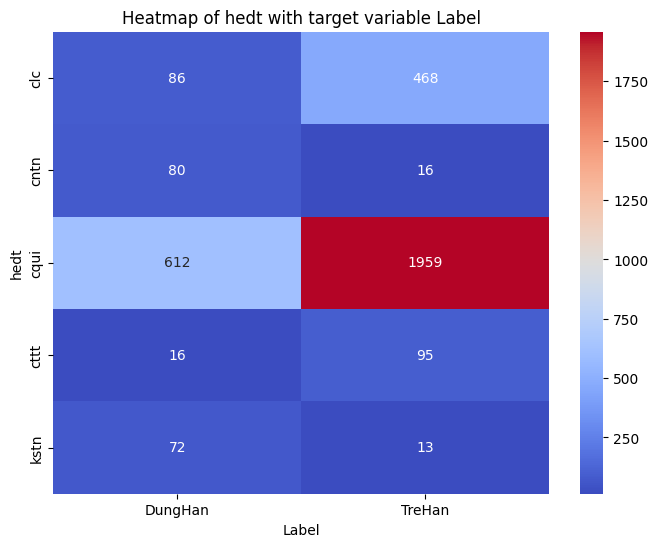

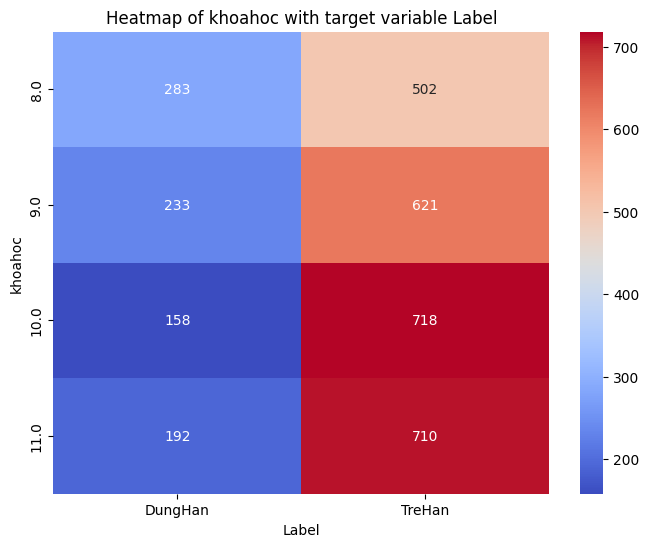

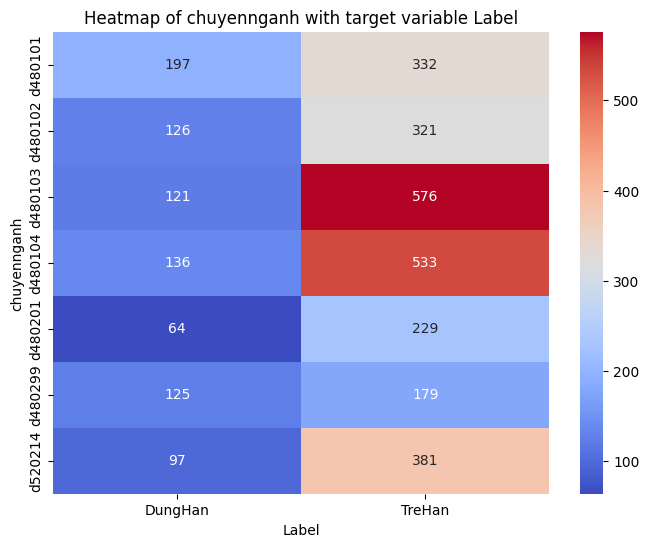

In [ ]:
DaiHoc_cate = ['khoa','hedt','khoahoc','chuyennganh']
plot_cate(DaiHoc_cate)

- Có sư khác nhau về tỉ lệ trễ hạn ở các khoa, khoa kttt, ktmt và cnpm có tỉ lệ trễ hạn tốt nghiệp cao nhất 1:5 và khoa mmt&tt có tỉ lệ thấp nhất.
- Hệ đào tạo CLC có tỉ lệ trễ hạn tốt nghiệp cao nhất , tiếp đó là cqui (chính quy).
- Ta có thể thấy các khóa học càng về sau , số càng cao thì tỉ lệ trễ hạn tốt nghiệp càng tăng.
- Tỉ lệ đúng/trễ hạn tốt nghiệp ở các ngành cũng khác nhau rõ rệt.

####Plot các biến về thông tin trước đại học: "dien_tt", "lop12_matinh", "truong_thpt"

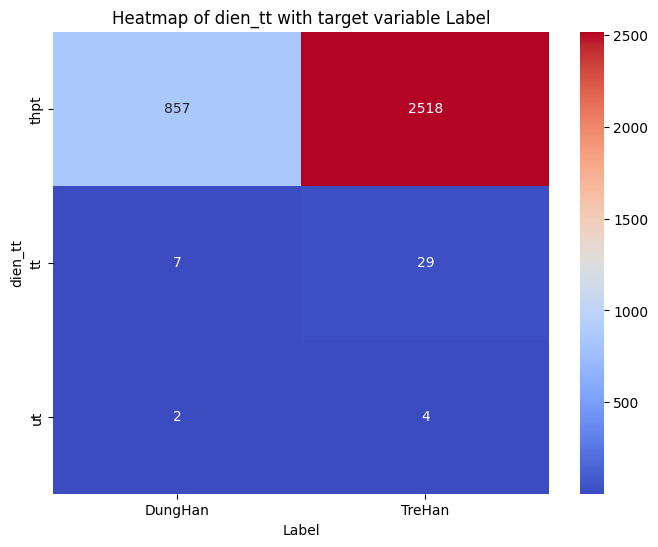

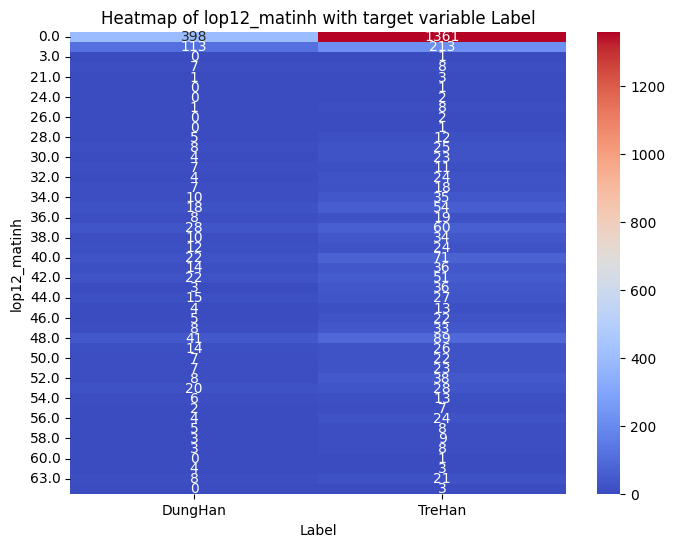

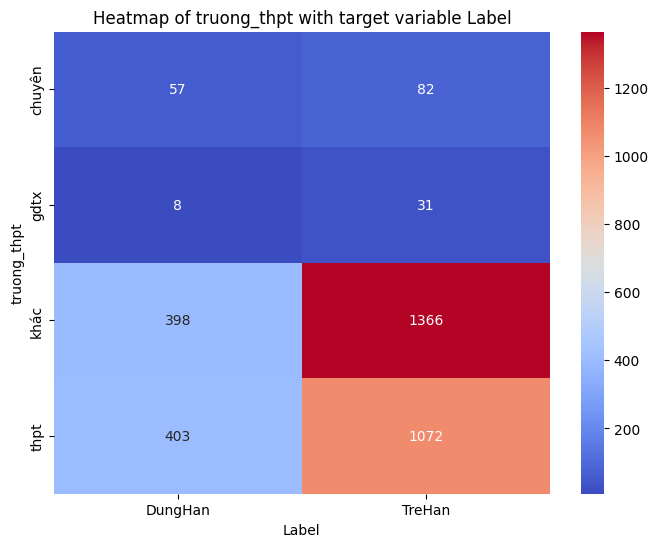

In [ ]:
Trc_DaiHoc_cate = ['dien_tt','lop12_matinh','truong_thpt']
plot_cate(Trc_DaiHoc_cate)

- Gần như không có sự khác nhau giữa tỉ lệ đúng /trễ hạn tốt nghiệp giữa các dien__tt (diện trúng tuyển).
- Với các trường chuyên thì tỉ lệ này khá cân bằng , tuy nhiên các trường khác thì tỉ lệ này khá cao 1:3.

###Kiểm định Chi square các biến phân loại

In [ ]:
import pandas as pd
import scipy.stats as stats

# Create list to store result
chi2_stats = []
p_values = []
significant = []
# use Chi-square
for feature in category_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Check p-value < 5%
    sig = p_val < 0.05

    # Store result to list
    chi2_stats.append(chi2_stat)
    p_values.append(p_val)
    significant.append(sig)

# Create data from list
result_df = pd.DataFrame({
    'Feature': category_features,
    'Chi2 Stat': chi2_stats,
    'p-value': p_values,
    '(p < 0.05)': significant
})
result_df.set_index('Feature', inplace=True)

# Sort value in chi2-stat
result_df = result_df.sort_values(by='Chi2 Stat', ascending=False)
result_df


,Chi2 Stat,p-value,(p < 0.05)
Feature,,,
hedt,367.394300,3.074693e-78,True
chuyennganh,122.175088,5.689949e-24,True
khoa,102.071692,1.933264e-20,True
noisinh,92.236552,4.969193e-04,True
khoahoc,81.833182,1.240990e-17,True
lop12_matinh,71.064637,7.904802e-03,True
gioitinh,60.182286,8.646686e-15,True
truong_thpt,28.768435,2.504896e-06,True
dien_tt,0.868843,6.476391e-01,False


- Nhận xét ta thấy có sự tương quan giữa các biến phân loại này với biến mục tiêu do p-value < 0.05 , ngoại trừ dien_tt.
- Một số biến như truong_thpt ,gioi tinh , lop12_matinh có chi-square rất thấp thể hiện được độ tương quan cao với biến mục tiêu.

##Ma trận tương quan giữa các biến liên tục

Text(0.5, 1.0, 'Correlation Matrix of Continuous Variables')

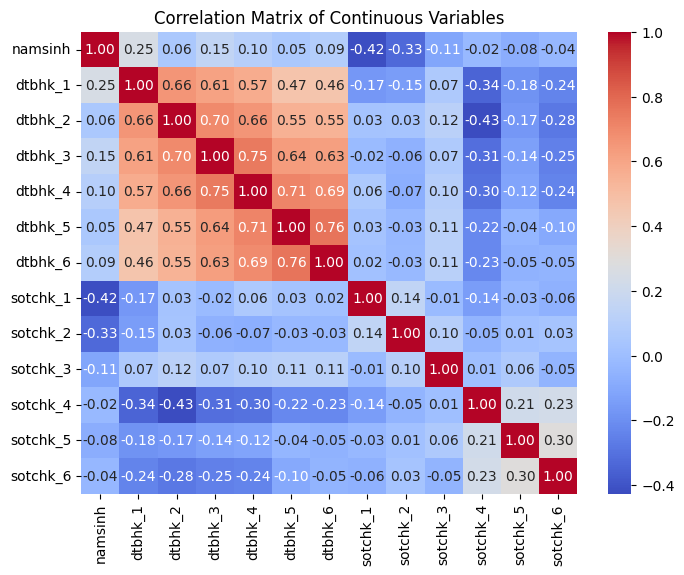

In [ ]:
correlation_matrix = df[continuous_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')

- Ta có thể nhận thấy các biến liên tục thuộc điểm trung bình học kì có sự tương quan với nhau trong khi đó giữa số tín chỉ học kì thì lại không.
- Có sự tương quan giữa số tín chỉ học kì và điểm trun bình học kì tuy nhiên tương quan này khá yếu.

##Phân tích two-way ANOVA

###Điểm rèn luyện qua từng học kì và Label

In [ ]:
# Chuẩn bị dữ liệu cho two-way ANOVA
# Sử dụng hàm melt của pandas để chuyển đổi dữ liệu từ dạng rộng sang dạng dài
# id_vars=['Label']: Giữ nguyên cột 'Label' (thời hạn tốt nghiệp)
# value_vars=drl_columns: Chuyển đổi các cột điểm rèn luyện (drl_1, drl_2, ...) thành các hàng riêng biệt
# var_name='HocKy': Tên cột mới chứa tên các học kỳ
# value_name='DiemRenLuyen': Tên cột mới chứa giá trị điểm rèn luyện
df_melted = pd.melt(df, id_vars=['Label'], value_vars=drl_col, var_name='HocKy', value_name='DiemRenLuyen')

# Thực hiện two-way ANOVA
# Xây dựng mô hình hồi quy tuyến tính với công thức 'DiemRenLuyen ~ C(Label) * C(HocKy)'
# DiemRenLuyen: Biến phụ thuộc (điểm rèn luyện)
# C(Label): Biến độc lập (thời hạn tốt nghiệp)
# C(HocKy): Biến độc lập (học kỳ)
# C(Label) * C(HocKy): Tương tác giữa thời hạn tốt nghiệp và học kỳ
model = ols('DiemRenLuyen ~ C(Label) * C(HocKy)', data=df_melted).fit()

# Thực hiện phân tích phương sai (ANOVA) với mô hình đã xây dựng
# typ=2: Sử dụng loại phân tích phương sai Type II
anova_table = sm.stats.anova_lm(model, typ=2)

# Hiển thị kết quả của phân tích ANOVA
print(anova_table)

                         sum_sq       df            F         PR(>F)
C(Label)            1428.292387      1.0  1175.656853  1.429484e-250
C(HocKy)             101.569498      5.0    16.720789   1.598469e-16
C(Label):C(HocKy)     40.654057      5.0     6.692638   3.079663e-06
Residual           24849.336285  20454.0          NaN            NaN


- C(Label): Giá trị p-value rất nhỏ (1.42e-250) cho thấy sự khác biệt đáng kể về điểm rèn luyện giữa các sinh viên tốt nghiệp đúng hạn và trễ hạn.
- C(HocKy): Giá trị p-value rất nhỏ (1.59e-16) cho thấy sự khác biệt đáng kể về điểm rèn luyện giữa các học kỳ.
- C(Label):C(HocKy): Giá trị p-value rất nhỏ (3.70e-06) cho thấy sự tương tác đáng kể giữa thời hạn tốt nghiệp và học kỳ, nghĩa là sự thay đổi điểm rèn luyện giữa các học kỳ có ảnh hưởng đến thời hạn tốt nghiệp.

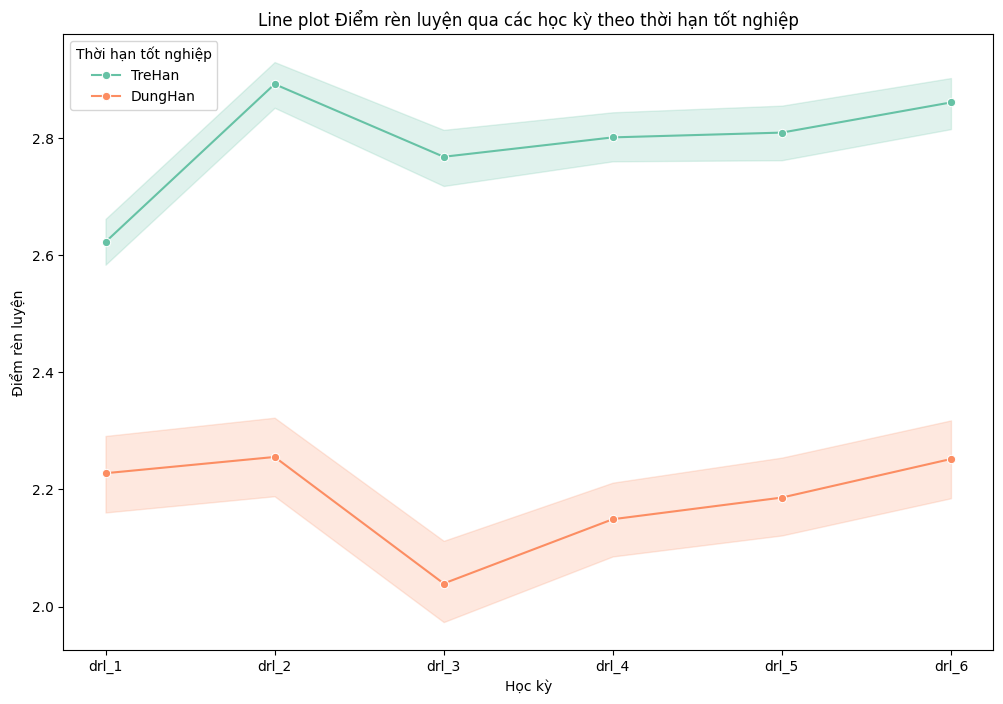

In [ ]:
# Visualize the results using line plot

# Line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='HocKy', y='DiemRenLuyen', hue='Label', data=df_melted, marker='o', palette="Set2")
plt.title('Line plot Điểm rèn luyện qua các học kỳ theo thời hạn tốt nghiệp')
plt.xlabel('Học kỳ')
plt.ylabel('Điểm rèn luyện')
plt.legend(title='Thời hạn tốt nghiệp')
plt.show()

- Điểm rèn luyện của sinh viên tốt nghiệp trễ hạn: Thấp hơn so với sinh viên tốt nghiệp đúng hạn và cao hơn ở các học kỳ đầu và giảm dần ở các học kỳ sau.
- Điểm rèn luyện của sinh viên tốt nghiệp đúng hạn: Thường cao hơn ở các học kì đầu và có xu hướng ổn định hơn qua các học kỳ.

###Điểm trung bình qua từng học kì và Label

In [ ]:
# Định nghĩa các cột cho DTBHK (Điểm trung bình học kỳ)
dtbhk_columns = ['dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6']

# Chuẩn bị dữ liệu cho two-way ANOVA
df_melted = pd.melt(df, id_vars=['Label'], value_vars=dtbhk_columns, var_name='HocKy', value_name='DiemTrungBinh')

# Thực hiện three-way ANOVA
model = ols('DiemTrungBinh ~ C(Label) * C(HocKy)', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Hiển thị kết quả
print(anova_table)

                         sum_sq       df            F         PR(>F)
C(Label)            5236.419792      1.0  2593.917590   0.000000e+00
C(HocKy)            1163.140930      5.0   115.234906  1.452166e-120
C(Label):C(HocKy)    318.109067      5.0    31.515758   4.340110e-32
Residual           41363.781937  20490.0          NaN            NaN


- C(Label): Giá trị p-value rất nhỏ (0.000000e+00) cho thấy sự khác biệt đáng kể về điểm trung bình học kỳ giữa các sinh viên tốt nghiệp đúng hạn và trễ hạn.
- C(HocKy): Giá trị p-value rất nhỏ (1.45e-120) cho thấy sự khác biệt đáng kể về điểm trung bình học kỳ giữa các học kỳ.
- C(Label):C(HocKy): Giá trị p-value rất nhỏ (4.34e-32) cho thấy sự tương tác đáng kể giữa thời hạn tốt nghiệp và học kỳ, nghĩa là sự thay đổi điểm trung bình học kỳ giữa các học kỳ có ảnh hưởng đến thời hạn tốt nghiệp.

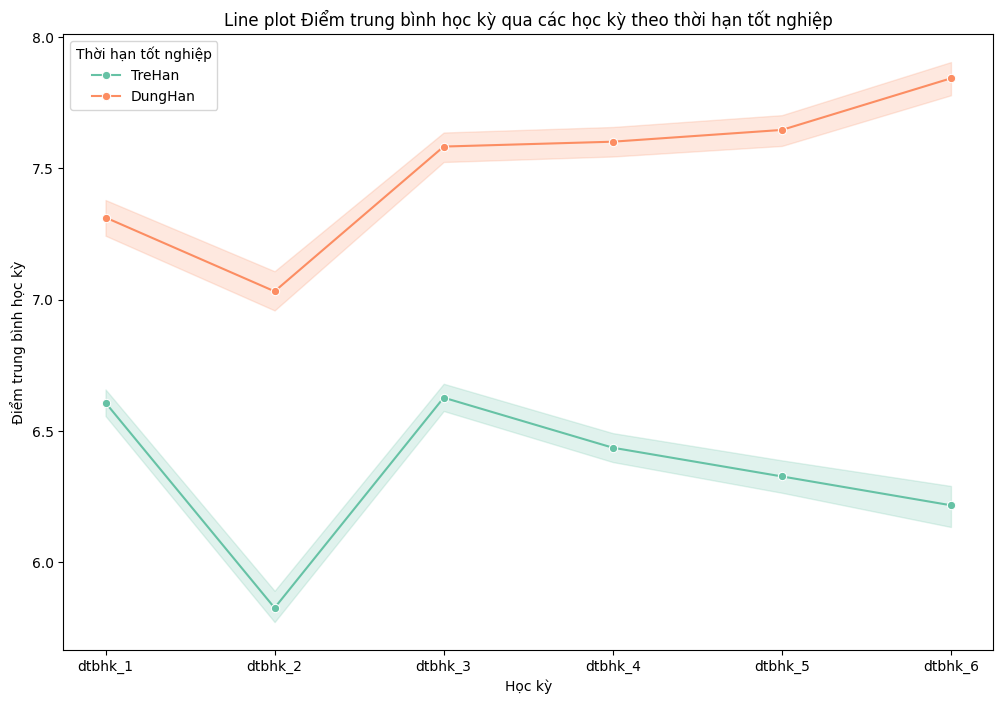

In [ ]:
# Trực quan hóa kết quả bằng biểu đồ line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='HocKy', y='DiemTrungBinh', hue='Label', data=df_melted, marker='o', palette="Set2")
plt.title('Line plot Điểm trung bình học kỳ qua các học kỳ theo thời hạn tốt nghiệp')
plt.xlabel('Học kỳ')
plt.ylabel('Điểm trung bình học kỳ')
plt.legend(title='Thời hạn tốt nghiệp')
plt.show()

- Điểm trung bình học kỳ của sinh viên tốt nghiệp đúng hạn: Thường cao hơn so với sinh viên tốt nghiệp trễ hạn.
- Xu hướng thay đổi: Điểm trung bình học kỳ của sinh viên tốt nghiệp đúng hạn có xu hướng ổn định hoặc tăng nhẹ qua các học kỳ, trong khi sinh viên tốt nghiệp trễ hạn có xu hướng giảm hoặc không ổn định.

###Số tín chỉ qua từng học kì và Label

In [ ]:
# Định nghĩa các cột cho SOTCHK (Số tín chỉ học kỳ)
sotchk_columns = ['sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6']

# Chuẩn bị dữ liệu cho two-way ANOVA
df_melted = pd.melt(df, id_vars=['Label'], value_vars=sotchk_columns, var_name='HocKy', value_name='SoTinChi')

# Thực hiện three-way ANOVA
model = ols('SoTinChi ~ C(Label) * C(HocKy)', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Hiển thị kết quả
print(anova_table)

                          sum_sq       df           F        PR(>F)
C(Label)               63.714225      1.0    4.960766  2.593954e-02
C(HocKy)            52747.248854      5.0  821.376282  0.000000e+00
C(Label):C(HocKy)    4406.221038      5.0   68.613350  2.196423e-71
Residual           263165.896754  20490.0         NaN           NaN


- C(Label): Giá trị p-value nhỏ (2.59e-02) cho thấy sự khác biệt đáng kể về số tín chỉ giữa các sinh viên tốt nghiệp đúng hạn và trễ hạn.
- C(HocKy): Giá trị p-value rất nhỏ (0.000000e+00) cho thấy sự khác biệt đáng kể về số tín chỉ giữa các học kỳ.
- C(Label):C(HocKy): Giá trị p-value rất nhỏ (2.19e-71) cho thấy sự tương tác đáng kể giữa thời hạn tốt nghiệp và học kỳ, nghĩa là sự thay đổi số tín chỉ giữa các học kỳ có ảnh hưởng đến thời hạn tốt nghiệp.

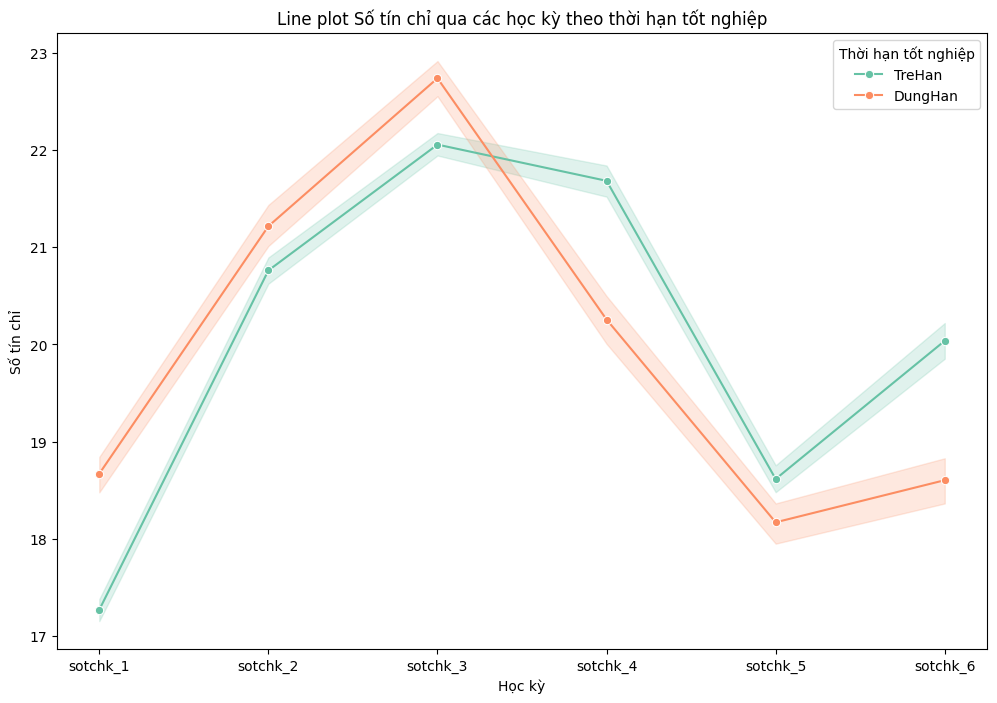

In [ ]:
# Trực quan hóa kết quả bằng biểu đồ line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='HocKy', y='SoTinChi', hue='Label', data=df_melted, marker='o', palette="Set2")
plt.title('Line plot Số tín chỉ qua các học kỳ theo thời hạn tốt nghiệp')
plt.xlabel('Học kỳ')
plt.ylabel('Số tín chỉ')
plt.legend(title='Thời hạn tốt nghiệp')
plt.show()

- Số tín chỉ của sinh viên tốt nghiệp đúng hạn: Thường cao hơn ở các học kỳ đầu và giảm dần ở các học kỳ sau.
- Số tín chỉ của sinh viên tốt nghiệp trễ hạn: Thường thấp hơn so với sinh viên tốt nghiệp đúng hạn và có xu hướng ổn định hơn qua các học kỳ.

### Số lần xử lý học vụ qua từng học kì và Label

In [ ]:
# Định nghĩa các cột cho XLHV (Xử lý học vụ)
xlhv_columns = ['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6']

# Chuẩn bị dữ liệu cho two-way ANOVA
df_melted = pd.melt(df, id_vars=['Label'], value_vars=xlhv_columns, var_name='HocKy', value_name='SoLanXLHV')

# Thực hiện three-way ANOVA
model = ols('SoLanXLHV ~ C(Label) * C(HocKy)', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Hiển thị kết quả
print(anova_table)

                       sum_sq       df           F        PR(>F)
C(Label)             5.075558      1.0  136.342076  2.111992e-31
C(HocKy)            16.656375      5.0   89.486306  1.891962e-93
C(Label):C(HocKy)    4.876258      5.0   26.197678  1.791708e-26
Residual           762.773966  20490.0         NaN           NaN


- C(Label): Giá trị p-value rất nhỏ (2.11e-31) cho thấy sự khác biệt đáng kể về số lần xử lý học vụ giữa các sinh viên tốt nghiệp đúng hạn và trễ hạn.
- C(HocKy): Giá trị p-value rất nhỏ (1.89e-93) cho thấy sự khác biệt đáng kể về số lần xử lý học vụ giữa các học kỳ.
- C(Label):C(HocKy): Giá trị p-value rất nhỏ (1.79e-26) cho thấy sự tương tác đáng kể giữa thời hạn tốt nghiệp và học kỳ, nghĩa là sự thay đổi số lần xử lý học vụ giữa các học kỳ có ảnh hưởng đến thời hạn tốt nghiệp.

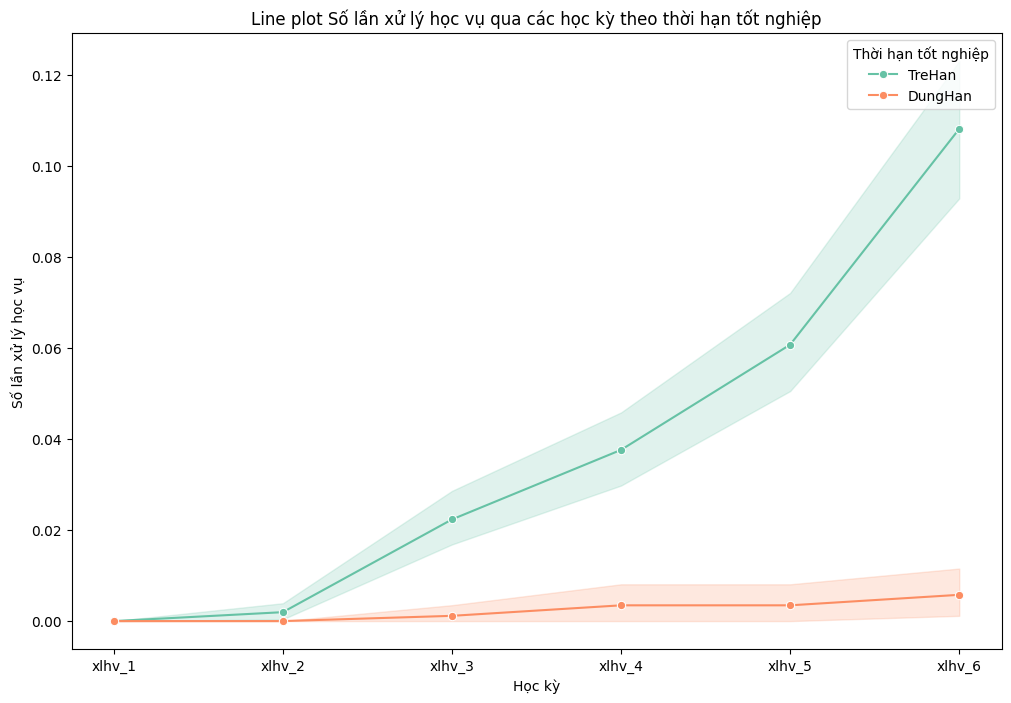

In [ ]:
# Trực quan hóa kết quả bằng biểu đồ line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='HocKy', y='SoLanXLHV', hue='Label', data=df_melted, marker='o', palette="Set2")
plt.title('Line plot Số lần xử lý học vụ qua các học kỳ theo thời hạn tốt nghiệp')
plt.xlabel('Học kỳ')
plt.ylabel('Số lần xử lý học vụ')
plt.legend(title='Thời hạn tốt nghiệp')
plt.show()

- Số lần xử lý học vụ của sinh viên tốt nghiệp đúng hạn: Thường thấp hơn ở các học kỳ đầu và có xu hướng tăng dần (tăng rất nhẹ) ở các học kỳ sau và có sự ổn định.
- Số lần xử lý học vụ của sinh viên tốt nghiệp trễ hạn: Thường cao hơn so với sinh viên tốt nghiệp đúng hạn và có xu hướng tăng dần và nhanh qua các học kỳ sau.